# **COVID-19 X-RAY (POSITIVE AND NEGATIVE) PREDICTION USING CNN MODEL WITH ACCURACY AND LOSS**

NAME : JOTHIKA R   
EMAIL : jothika.r20@gmail.com

## **Link the drive with Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Datasets**

In [ ]:
train = "MyDrive/COVID-19-master/COVID-19-master/Train"
val = "MyDrive/COVID-19-master/COVID-19-master/Val"


In [ ]:
import pandas as pd
df =pd.read_csv("/content/drive/MyDrive/COVID-19-master/COVID-19-master/metadatafile.csv")


In [ ]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


# **Import Required Libraries**





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from tensorflow.keras.preprocessing import image



# **Building Architecture**

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

# **Data Agumentation**

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/COVID-19-master/COVID-19-master/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 225 images belonging to 2 classes.


In [ ]:

train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'drive/MyDrive/COVID-19-master/COVID-19-master/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


# **Fit the Model with Epoch**

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

<ipython-input-13-e59c1f494e68>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 95s 15s/step - loss: 0.7151 - accuracy: 0.5699 - val_loss: 0.6804 - val_accuracy: 0.5500
Epoch 2/10
7/7 [==============================] - 78s 11s/step - loss: 0.5641 - accuracy: 0.7098 - val_loss: 0.5028 - val_accuracy: 0.6833
Epoch 3/10
7/7 [==============================] - 69s 9s/step - loss: 0.4179 - accuracy: 0.8031 - val_loss: 0.3955 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 68s 11s/step - loss: 0.4793 - accuracy: 0.8083 - val_loss: 0.4653 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 75s 11s/step - loss: 0.3629 - accuracy: 0.8497 - val_loss: 0.2890 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 68s 10s/step - loss: 0.5437 - accuracy: 0.8187 - val_loss: 0.5940 - val_accuracy: 0.9333
Epoch 7/10
7/7 [==============================] - 76s 11s/step - loss: 0.3203 - accuracy: 0.9062 - val_loss: 0.1263 - val_accuracy: 0.9500
Epoch 8/10
7/7 [============

In [ ]:
model.save("model_adv.h5")

# **Evaluating the Training and validation datasets Accuracy and Loss**

# ***Loss is very less and accuracy is on point***

In [ ]:
#training accuracy and loss
model.evaluate_generator(train_generator)

[0.28617483377456665, 0.8933333158493042]

In [ ]:
#Validating accuracy and loss
model.evaluate_generator(validation_generator)

<ipython-input-18-04844990902b>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.24136978387832642, 0.8999999761581421]

# **Test Images**

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image

from PIL import Image
for i in os.listdir("drive/MyDrive/COVID-19-master/COVID-19-master/Val/Normal/"):
  img = image.load_img("drive/MyDrive/COVID-19-master/COVID-19-master/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)


1/1 [==============================] - 0s 90ms/step


In [ ]:
for i in os.listdir("drive/MyDrive/COVID-19-master/COVID-19-master/Val/Covid/"):
  img = image.load_img("drive/MyDrive/COVID-19-master/COVID-19-master/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p =  (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 92ms/step


# **Confusion Matrix Pre Processing**

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual, y_test)

Text(33.0, 0.5, 'True Label')

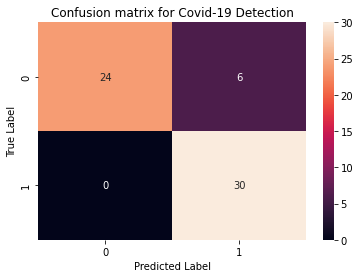

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap=None, annot=True)
plt.title('Confusion matrix for Covid-19 Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# **All Data in History**

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Summarize history for Loss**




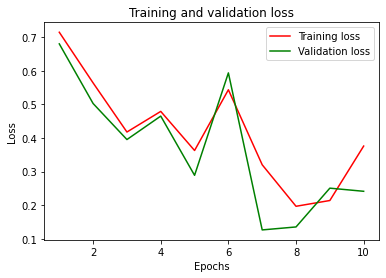

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Summarize History for Accuracy**

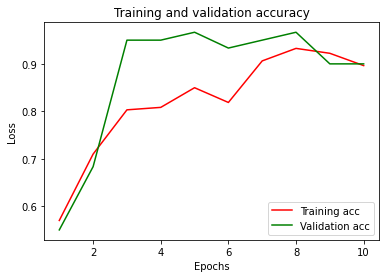

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Predicting the X-Ray Images **

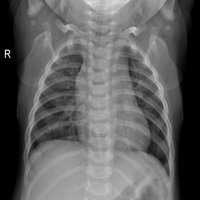

1/1 [==============================] - 0s 89ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


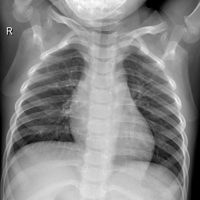

1/1 [==============================] - 0s 99ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


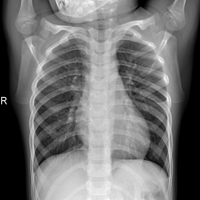

1/1 [==============================] - 0s 90ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


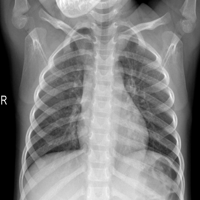

1/1 [==============================] - 0s 87ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


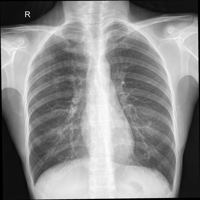

1/1 [==============================] - 0s 89ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


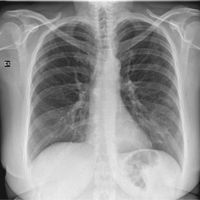

1/1 [==============================] - 0s 100ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


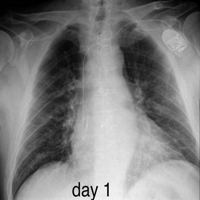

1/1 [==============================] - 0s 101ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


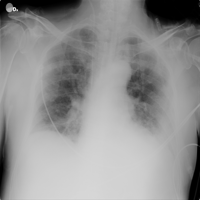

1/1 [==============================] - 0s 89ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


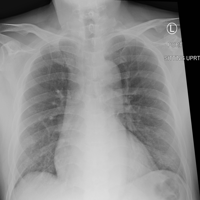

1/1 [==============================] - 0s 87ms/step
Radiologist: COVID-19 +ve
Radiologist: COVID-19 -ve


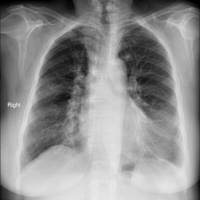

1/1 [==============================] - 0s 93ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   
from PIL import Image
j = 0
for i in os.listdir("drive/MyDrive/COVID-19-master/COVID-19-master/Val/Normal/"):
  j = j+1
  pil_img = Image.open('drive/MyDrive/COVID-19-master/COVID-19-master/Val/Normal/'+i)
  im = pil_img
  size = (200,200) 
  
  
  out = im.resize(size)
  display(out)
  img = image.load_img("drive/MyDrive/COVID-19-master/COVID-19-master/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p =  (model.predict(img) > 0.5).astype("int32")
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("drive/MyDrive/COVID-19-master/COVID-19-master/Val/Covid/"):
  j = j+1
  pil_img = Image.open('drive/MyDrive/COVID-19-master/COVID-19-master/Val/Covid/'+i)
  im = pil_img
  size = (200,200) 
  
 
  out = im.resize(size)
  display(out)
  img = image.load_img("drive/MyDrive/COVID-19-master/COVID-19-master/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p =  (model.predict(img) > 0.5).astype("int32")
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if p==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break

# **Predicting Positve Covid Case**

1/1 [==============================] - 0s 92ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


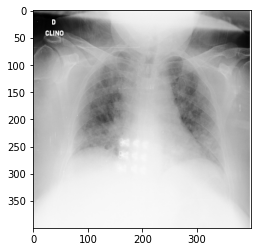

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image

import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
xtest_image = image.load_img('/content/drive/MyDrive/COVID-19-master/COVID-19-master/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread('/content/drive/MyDrive/COVID-19-master/COVID-19-master/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

# **Predicting the Negative Covid Case**

1/1 [==============================] - 0s 89ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


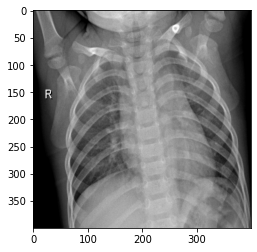

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image

import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
xtest_image = image.load_img('/content/drive/MyDrive/COVID-19-master/COVID-19-master/Train/Normal/IM-0156-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = (model.predict(xtest_image))
# training_set.class_indices
imggg = cv2.imread('/content/drive/MyDrive/COVID-19-master/COVID-19-master/Train/Normal/IM-0156-0001.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)